In [1]:
import pandas as pd
dataset = pd.read_csv("/content/Pos MLs03a carro foi vendido.csv")
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
from datetime import datetime
dataset['model_year'] = datetime.today().year - dataset['model_year']
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,23,30941.02,yes
1,1,7843,25,40557.96,yes
2,2,7109,17,89627.50,no
3,3,26823,8,95276.14,no
4,4,7935,9,117384.68,yes


In [3]:
dataset['km_year'] = dataset['mileage_per_year'] * 1.60934
dataset['price_brl'] = dataset['price'] * 4.943
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,km_year,price_brl
0,0,21801,23,30941.02,yes,35085.22134,152941.46186
1,1,7843,25,40557.96,yes,12622.05362,200477.99628
2,2,7109,17,89627.50,no,11440.79806,443028.73250
3,3,26823,8,95276.14,no,43167.32682,470949.96002
4,4,7935,9,117384.68,yes,12770.11290,580232.47324


In [4]:
dataset = dataset.drop(columns=['Unnamed: 0', 'price', 'mileage_per_year'], axis=1)
dataset.head()

,model_year,sold,km_year,price_brl
0,23,yes,35085.22134,152941.46186
1,25,yes,12622.05362,200477.99628
2,17,no,11440.79806,443028.73250
3,8,no,43167.32682,470949.96002
4,9,yes,12770.11290,580232.47324


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x = dataset[['model_year', 'km_year', 'price_brl']]
y = dataset["sold"]

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

# Padronização
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Utilizando SVC ao invés do LinearSVC
model = SVC()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

acc = accuracy_score(y_test, prediction)
print(f'Accuracy is {acc}')

Accuracy is 0.7748


In [16]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

# Exemplo de generalização da árvore através da poda
# max_depth
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

acc = accuracy_score(y_test, prediction)
print(f'Accuracy is {acc}')

Accuracy is 0.7928


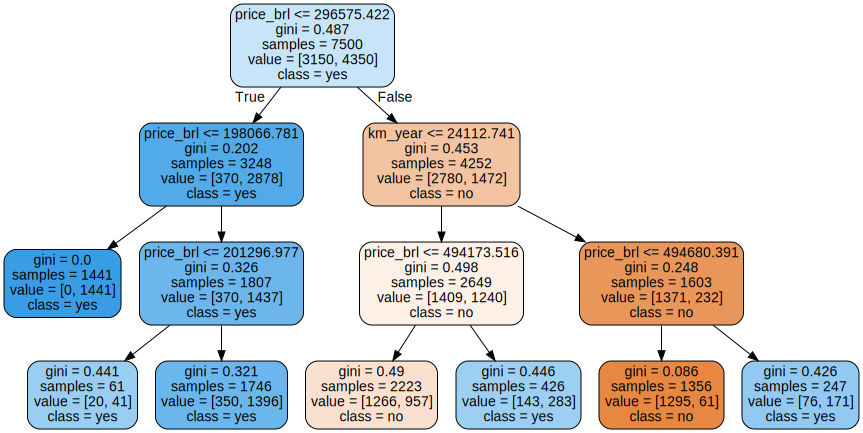

In [18]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
v = export_graphviz(model, out_file=None, filled=True, rounded = True, feature_names = x.columns, class_names=["no","yes"])
g = graphviz.Source(v)
g